In [1]:
!pip install pandas
!pip install scikit-learn 
!pip install numpy
!pip install pillow
!pip install matplotlib

#                                     <u> Heart Disease Analysis <u>
    This analysis looks in to using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.
    
    Steps:
    1. Problem definition
    2. Data 
    3. Evaluation 
    4. Features 
    5. Modelling
    6. Experimentation
    
    
## 1. Problem defintion
    
> Given the clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
       
   The  Original Data came from the Cleaveland data from The UCI Machine Learning Repository, but used the version of it that is available on kaggle. Link: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
       
## 3. Evaluation: 
Since we are predicting whether or not someone has hearth disease, this will be a classification problem. Therfore  we will focus on the accuracy of the model. If we can achieve a  95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.      

## 4. Features:
       
       ** Creating a Data Dictionary(understanding what ech column represents in detail)**
       
* age -(age in years)

* sex - sex (1: male; 0: female)

* cp - chest pain type 
   * 0: typical angina 
   * 1: atypical angina 
   * 2: non-anginal pain 
   * 3: asymptomatic

* trestbps- resting blood pressure in mm Hg on admission to the hospital.Anything above 130-140 is typically cause for concern.

* chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2 triglycerides 
   * above 200 is cause for concern.

* fbs - fasting blood sugar > 120 mg/dl (1: true; 0: false). If its > 126 mg/dl then it signals for diabetes

* restecg - resting electrocardiographic results 
    * 0: normal 
    * 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria( This enlarges hearts main pumping chamber)

* thalach - maximum heart rate achieved

* exang - exercise induced angina (1: yes; 0: no)

* oldpeak - ST depression induced by exercise relative to rest

* slope - the slope of the peak exercise ST segment
      * 0: upsloping 
      * 1: flat 
      * 2: downsloping)

* ca - number of major vessels (0-3) colored by flourosopy

* thal - thalium stress result 
       0: normal; 
       1: fixed defect: Used to be defect but ok now. 
       2: reversable defect: No proper blood movement when exercising

* condition/target- disease condition, which means whether they have heart disease or not. (0: No disease; 1: disease) (The predicted attribute).

## Tools Preparation

Tools: 
  * Pandas, Matplotlib and Numpy for data analysis and Manipulation.
  * Scikit-learn library for our models(modelling)

*Importing tools*

*Exploratory data analysis(EDA), Machine learning and plotting libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

## Load Data 

In [3]:
data = pd.read_csv("heartdisease.csv")
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

Finding out more about the data



In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
data.index

RangeIndex(start=0, stop=303, step=1)

In [11]:
data.shape

(303, 14)

In [12]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
## finding out the total number of each class 
data["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [14]:
data[data["target"] ==1] # snapshot of when someone has heart disease, which is when target(target variable) is = 1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [15]:
data[data["target"] == 0]  # snapshot of when someone does not have heart disease, which is when target(target variable) is = 0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


*Frequency of target variable*

<Axes: xlabel='target'>

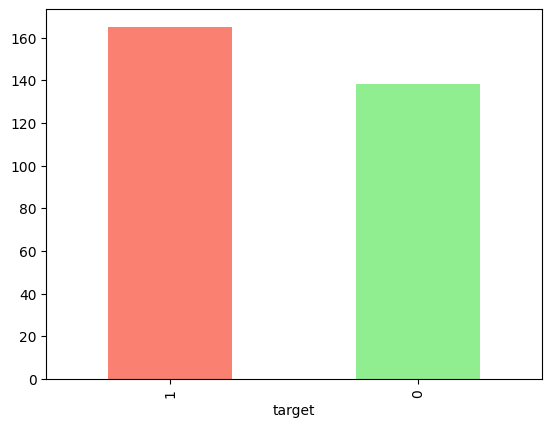

In [16]:
data["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightgreen"])

In [17]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Heart disease frequency according to Sex**

In [19]:
data.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [20]:
pd.crosstab(data["target"], data["sex"])

sex,0,1
target,,
0,24,114
1,72,93


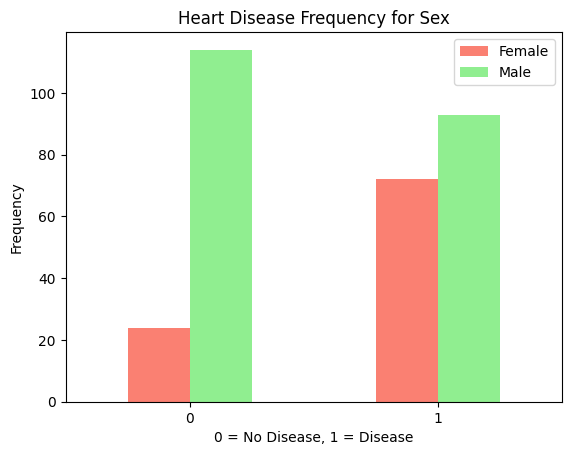

In [21]:
pd.crosstab(data["target"], data["sex"]).plot(kind="bar", color =["salmon","lightgreen"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

**comparing age and thalach to the target variable(exploring with scatter plot)** 

*Scatter with Positive examples (when target == 1)*

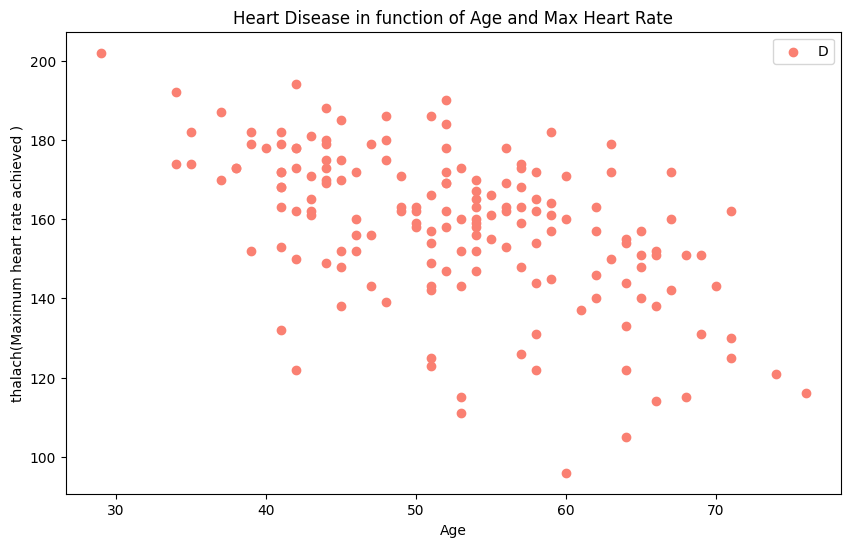

In [22]:
plt.figure(figsize= (10,6))

plt.scatter(data.age[data.target == 1], data.thalach[data.target ==1], color ="salmon" )
plt.xlabel("Age")
plt.ylabel("thalach(Maximum heart rate achieved )")
plt.title("Heart Disease in function of Age and Max Heart Rate");
plt.legend("D"); # D stands for disease(traget == 1)

*Scatter with just Negative examples (when target == 0)*

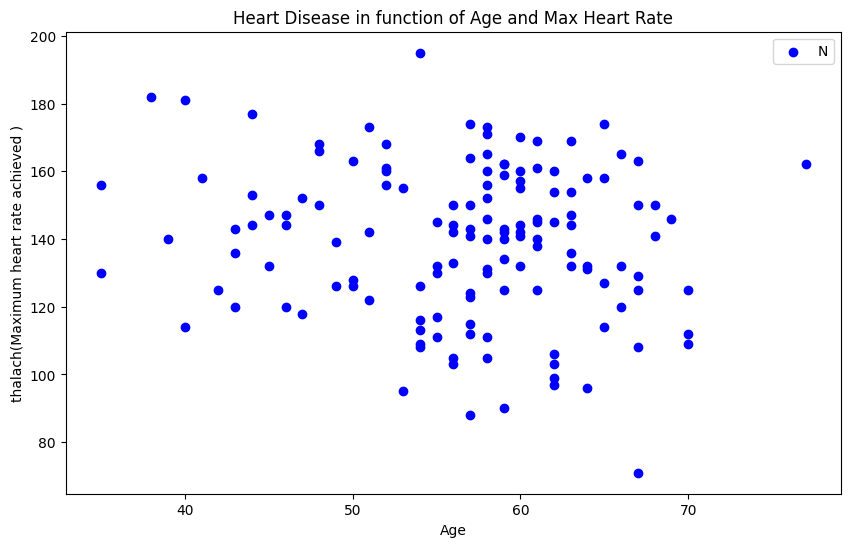

In [23]:
plt.figure(figsize= (10,6))

plt.scatter(data.age[data.target == 0], data.thalach[data.target ==0], color ="blue" )
plt.xlabel("Age")
plt.ylabel("thalach(Maximum heart rate achieved )")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.legend("N") # N stands for No disease(target == 0)

*scatter plot with both positive and negative expamples*

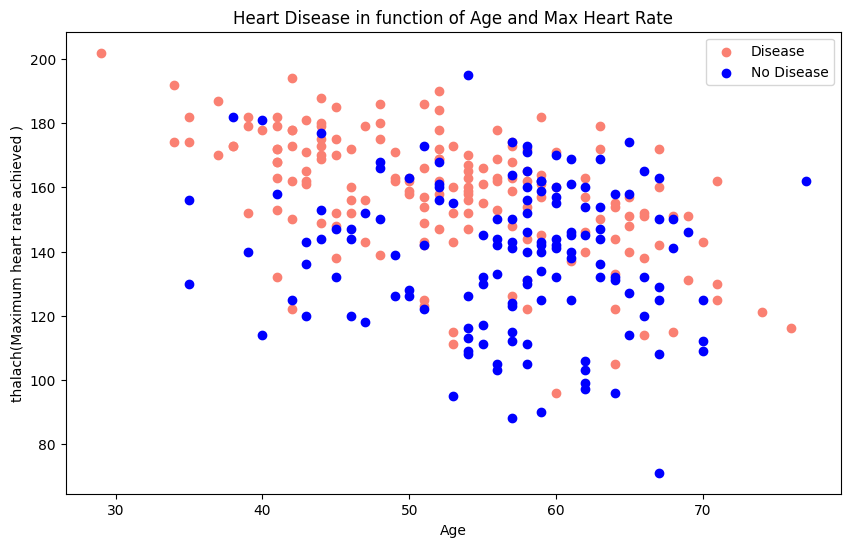

In [24]:
plt.figure(figsize= (10,6))

plt.scatter(data.age[data.target == 1], data.thalach[data.target ==1], color ="salmon" )

plt.scatter(data.age[data.target == 0], data.thalach[data.target ==0], color ="blue")

plt.xlabel("Age")
plt.ylabel("thalach(Maximum heart rate achieved )")
plt.title("Heart Disease in function of Age and Max Heart Rate");
plt.legend(["Disease", "No Disease"]);

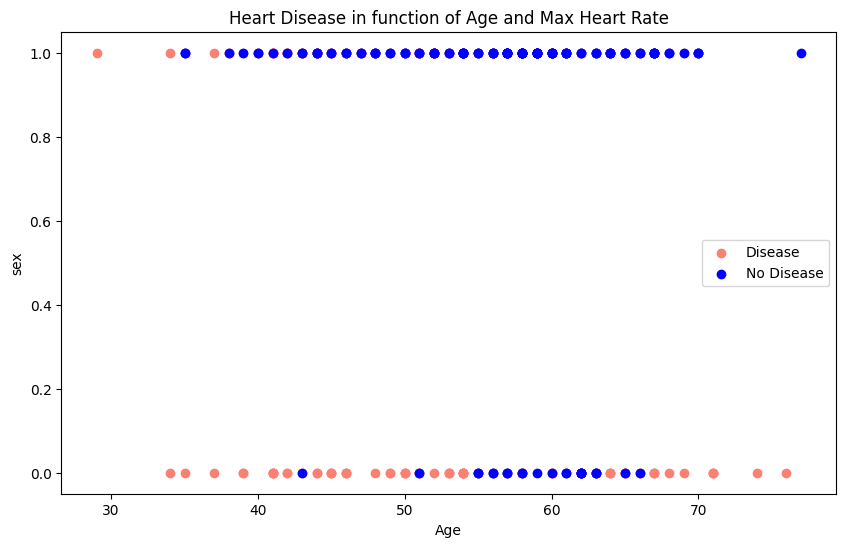

In [25]:
plt.figure(figsize= (10,6))

plt.scatter(data.age[data.target == 1], data.sex[data.target ==1], color ="salmon" )

plt.scatter(data.age[data.target == 0], data.sex[data.target ==0], color ="blue")

plt.xlabel("Age")
plt.ylabel("sex")
plt.title("Heart Disease in function of Age and Max Heart Rate");
plt.legend(["Disease", "No Disease"]);

# Creating a sublot and plotting sublots in one figure/plot.

**Plotting Maximum heart rate achieved and cholesterol level against Age**

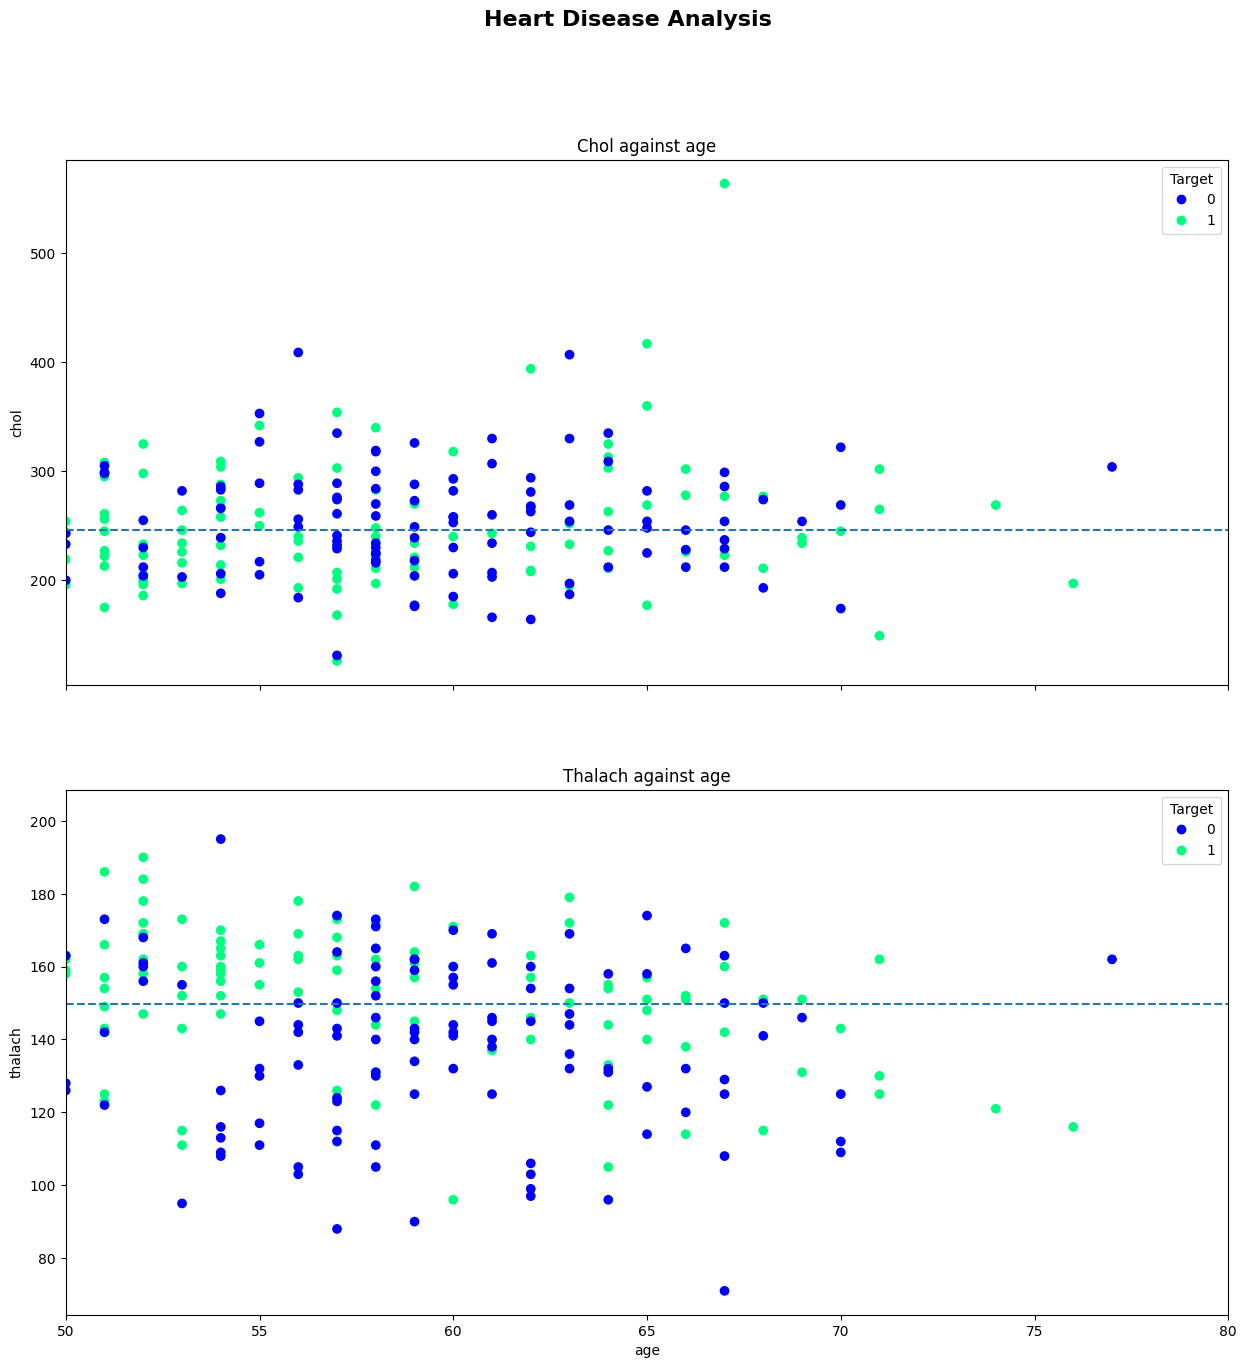

In [26]:
fig, (ax0, ax1) =plt.subplots(nrows = 2, ncols =1 , figsize =(15,15), sharex =True)

scatter = ax0.scatter(data["age"],data["chol"], c=data["target"], cmap="winter")
ax0.set(title = "Chol against age",ylabel ="chol")
ax0.legend(*scatter.legend_elements(), title ="Target")
ax0.axhline(data["chol"].mean(), linestyle ="--")
ax0.set_xlim(50,80)

scatter1 = ax1.scatter(data["age"],data["thalach"], c=data["target"], cmap="winter")
ax1.set(title = "Thalach against age",xlabel ="age",ylabel ="thalach")
ax1.legend(*scatter1.legend_elements(), title ="Target")
ax1.axhline(data["thalach"].mean(), linestyle ="--")
ax1.set_xlim(50,80)

# 
fig.suptitle("Heart Disease Analysis", fontsize =16, fontweight = "bold");


<Axes: ylabel='Frequency'>

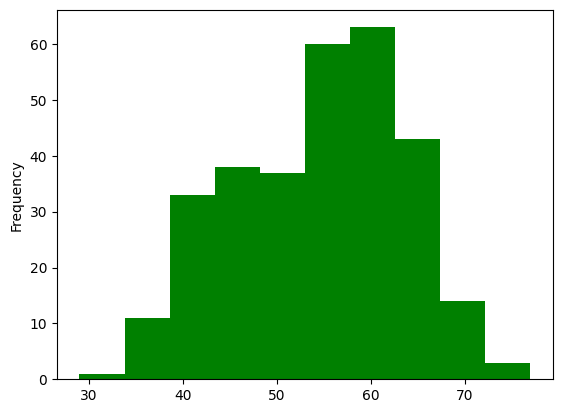

In [27]:
# Checking the distribution of the age column(spread of the age)
data.age.plot(kind ="hist", color = "green")

In [28]:
data.age.value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

**Heart Disease Frequency per Chest Pain Type**
* cp - chest pain type 
   * 0: typical angina 
   * 1: atypical angina 
   * 2: non-anginal pain 
   * 3: asymptomatic

<Figure size 1000x600 with 0 Axes>

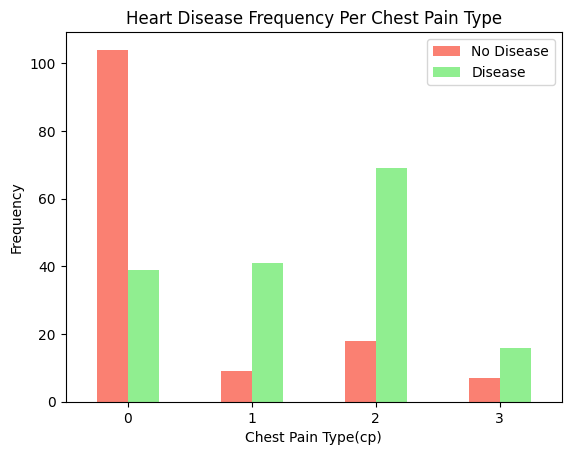

In [29]:
plt.figure(figsize = (10,6))

pd.crosstab(data.cp, data.target).plot(kind ="bar", color =["salmon", "lightgreen"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type(cp)")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

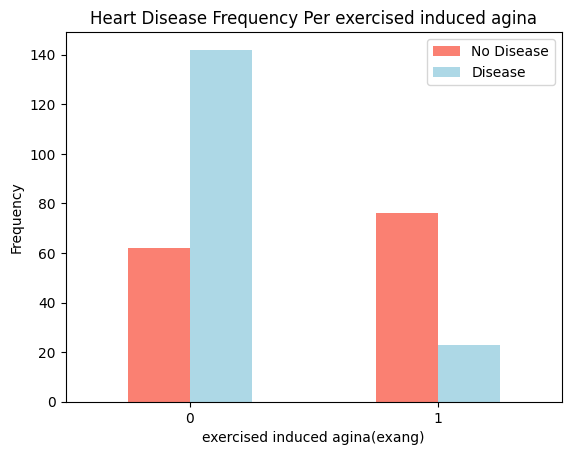

In [30]:
pd.crosstab(data.exang, data.target).plot(kind = "bar", color =["salmon", "lightblue"])
plt.title("Heart Disease Frequency Per exercised induced agina")
plt.xlabel("exercised induced agina(exang)")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

**Correlation between the independent variables(Exploring the relationship between variables.whether + or - correlation)**

 Lets make a correlation matrix

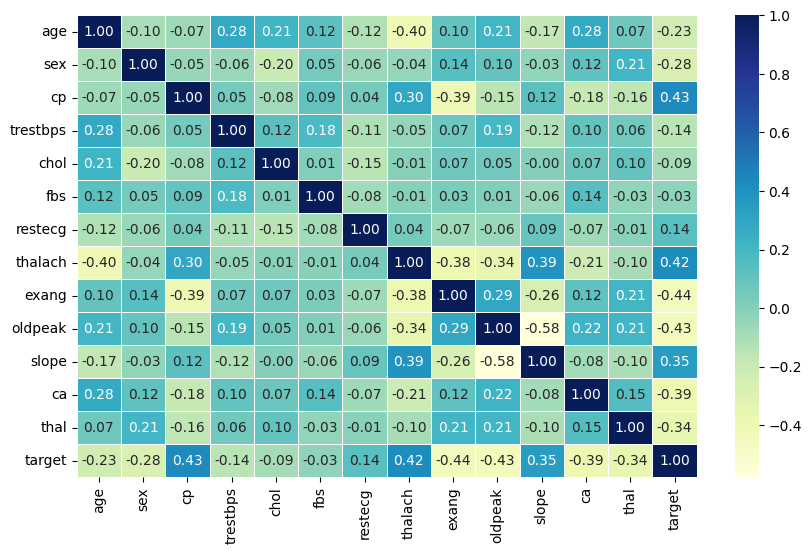

In [31]:
fig, ax = plt.subplots(figsize = (10,6))
corr = data.corr()
ax = sns.heatmap(corr, annot= True, linewidths =0.5, fmt = ".2f", cmap ="YlGnBu");

 # 5. Modelling

In [32]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


** Getting data ready**

In [33]:
#Split data in to X and y
np.random.seed(42)
X = data.drop("target", axis = 1)
y = data["target"]

# Split our data in to train and test sets
np.random.seed(10)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

**Choosing an estimator/algorithm using ML map for a classification problem. Lets try the following models**

   * Logistic Regression
   * Support Vector Classifier (SVC)
   * Random forest Classifier

*Using Linear SVC Machine learning model*

In [34]:
#Split data in to X and y
np.random.seed(42)
X = data.drop("target", axis = 1)
y = data["target"]

# Split our data in to train and test sets
np.random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

model1 = SVC()
model1.fit(X_train, y_train)
model1.predict(X_test)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [35]:
model1.score(X_test, y_test)

0.5901639344262295

*Using RandomForestClassifier Model*

In [36]:
#Split data in to X and y
np.random.seed(42)
X = data.drop("target", axis = 1)
y = data["target"]

# Split our data in to train and test sets
np.random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_preds= model2.predict(X_test) 
y_preds

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [37]:
score = model2.score(X_test, y_test) # Using the Estimator score method in evaluating the quality of our model
score

0.7868852459016393

**Since the RandomForestForestClassifier performed better with a 78% accuracy score further analysis will be 
  perforemed on it. Note that 78% accuracy score is not the best. A 90-95% accuracy score is always good.** 

*Instatiating RandomForest Model again*

In [38]:
np.random.seed(42)
X = data.drop("target", axis = 1)
y = data["target"]

# Split our data in to train and test sets
np.random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_preds= model2.predict(X_test) 
y_preds

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

*Comaparing actual and predicted Values*

In [39]:
df1 = pd.DataFrame({"Actual Values":y_test, "Predicted Values": y_preds})
df1

,Actual Values,Predicted Values
246,0,0
183,0,0
229,0,0
126,1,1
184,0,0
...,...,...
277,0,1
121,1,1
187,0,0
301,0,0


*Using the Estimator Score Method(Accuracy score)*

In [40]:
score = model2.score(X_test, y_test) # Using the Estimator score method in evaluating the quality of our model
score
print(f"Cross_Validated Accuracy score: {score * 100:.2f} %") 

Cross_Validated Accuracy score: 78.69 %


*Using the Estimator score method, but with cross_validation*

In [41]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(model2, X, y, cv =5)
cross_val

cross_val_score= np.mean(cross_val)
cross_val_score
print(f"Cross_Validated Accuracy score: {cross_val_score * 100:.2f} %") 

Cross_Validated Accuracy score: 82.48 %


## Using predict_proba function to understand the probabblity that the predicted variables is true

In [42]:
y_probs = model2.predict_proba(X_test)
y_probs[:5]

array([[0.9 , 0.1 ],
       [0.63, 0.37],
       [0.7 , 0.3 ],
       [0.28, 0.72],
       [0.84, 0.16]])

In [43]:
y_probs_positive = y_probs[:,1] ## y_probs_positive is the positve class of y_probs which are all values in column 1 of  u = pd.Series(y_probs_positive)        
u = pd.Series(y_probs_positive) ##-- y_probs, that is to say values to the right. values to the left is the negative class.     
u

0     0.10
1     0.37
2     0.30
3     0.72
4     0.16
      ... 
56    0.83
57    0.81
58    0.02
59    0.06
60    0.74
Length: 61, dtype: float64

 ## Calculate the fpr,tpr, and threshold using the positive class of y_probs

In [44]:
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)
## check the false positive rate 
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02857143, 0.02857143, 0.02857143, 0.05714286,
       0.08571429, 0.08571429, 0.31428571, 0.34285714, 0.34285714,
       0.37142857, 0.37142857, 0.4       , 0.45714286, 0.51428571,
       0.62857143, 0.62857143, 0.65714286, 0.74285714, 0.94285714,
       1.        ])

In [45]:
tpr

array([0.        , 0.03846154, 0.19230769, 0.30769231, 0.34615385,
       0.5       , 0.5       , 0.57692308, 0.65384615, 0.69230769,
       0.76923077, 0.80769231, 0.80769231, 0.84615385, 0.88461538,
       0.88461538, 0.92307692, 0.92307692, 0.92307692, 0.92307692,
       0.92307692, 0.96153846, 1.        , 1.        , 1.        ,
       1.        ])

In [46]:
threshold

array([ inf, 0.96, 0.92, 0.87, 0.86, 0.84, 0.83, 0.8 , 0.75, 0.74, 0.72,
       0.68, 0.4 , 0.37, 0.36, 0.32, 0.31, 0.3 , 0.21, 0.17, 0.14, 0.13,
       0.12, 0.1 , 0.01, 0.  ])

## Create a function for creating ROC curves

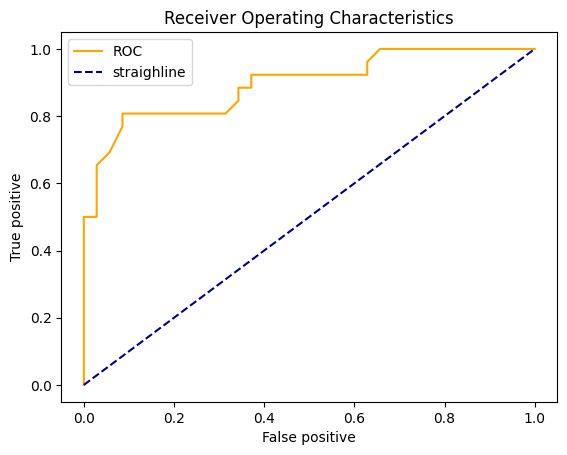

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc_curve(fpr, tpr):
    
    """
    Plot a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model
    
    """
    ## Plot roc_curve
    plt.plot(fpr, tpr, color ="orange", label ="ROC")
    #plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color ="darkblue", linestyle= "--" , label = "straighline")
    plt.xlabel("False positive")
    plt.ylabel("True positive")
    plt.title("Receiver Operating Characteristics")
    plt.legend()
    plt.show()
    

plot_roc_curve(fpr, tpr) 

## Confusion Matrix is a quick way to compare the labels a model predict and the actual label it was suppose to predict. In essence, giving you an idea of where the model is getting confused.

In [48]:
confusion_matrix(y_test, y_preds)
compare = pd.crosstab(y_test, y_preds, rownames = ["Actual Labels"], colnames= ["Predictive Labels"])
compare

Predictive Labels,0,1
Actual Labels,,
0,27,8
1,5,21


**Make our confusion matrix more visible with seaborn heatmap. Seaborn is a data visualization library built on matplotlib.**

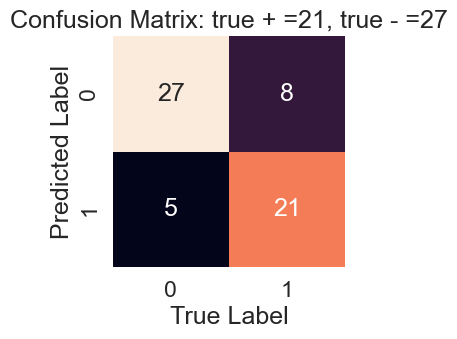

In [49]:
sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test, y_preds)
fig , ax =plt.subplots(figsize = (3,3))
sns.heatmap(conf_mat, annot =True, cbar =False) #Annotate the boxes with conf_mat info
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix: true + =21, true - =27");

# Evaluating our Classifier 

**Classification Report**

In [50]:
classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.84      0.77      0.81        35\n           1       0.72      0.81      0.76        26\n\n    accuracy                           0.79        61\n   macro avg       0.78      0.79      0.78        61\nweighted avg       0.79      0.79      0.79        61\n'

**Accuracy, Precison, recall and f1 score Evaluation**

In [51]:
from sklearn.metrics import accuracy_score
np.random.seed(42)

print(F"Classifier Metrics on the testset")
print(f"Accuracy score: {accuracy_score(y_test,y_preds)* 100:.2f} %")
print(f"precision score: {precision_score(y_test,y_preds)}")
print(f"recall score: {recall_score(y_test,y_preds)}")
print(f"f1 score: {f1_score(y_test,y_preds)}")

Classifier Metrics on the testset
Accuracy score: 78.69 %
precision score: 0.7241379310344828
recall score: 0.8076923076923077
f1 score: 0.7636363636363636


**Accuracy, Precison, recall and f1 score Evaluation using Cross Validation**

In [52]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
import numpy as np

X = data.drop("target", axis =1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)
clff = RandomForestClassifier()

cv_acc = cross_val_score(clff, X, y, cv =5)
cv_accuracy = np.mean(cv_acc)

cv_rec = cross_val_score(clff, X, y, cv=5, scoring ="recall")
cv_recall = np.mean(cv_rec)

cv_prec = cross_val_score(clff, X, y, cv =5, scoring = "precision")
cv_precision = np.mean(cv_prec)

cv_f = cross_val_score(clff, X, y, cv =5, scoring = "f1")
cv_f1 = np.mean(cv_f)      

print(f"Cross_Validated Accuracy score: {cv_accuracy *100:.2f} %")
print(f"Cross_Validated Recall Score: {cv_recall *100:.2f} %")
print(f"Cross_Validated Precision Score: {cv_precision *100:.2f} %")
print(f"Cross_Validated F1 score: {cv_f1 *100:.2f} %")

Cross_Validated Accuracy score: 82.15 %
Cross_Validated Recall Score: 84.85 %
Cross_Validated Precision Score: 83.78 %
Cross_Validated F1 score: 85.25 %


**We can see that our cross validated model performed bettter with better evaluation metric score. Generally it is preferrable to use cross validation in other to avoid false generalization**

**Creating a validation set and running our model**

*first lets  create a function for our evaluation metric*

In [53]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y-true labels vs y_pred labels
    
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision":round(accuracy, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precison: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"f1_score: {f1 * 100:.2f}%")
    
    return metric_dict

**Creating our baseline model(No tunning of hyperparameters)**

In [54]:
np.random.seed(42)

#Shuffle data. Note its always good to shuffle data to make sure they dont come in order they come in.
data_shuffled = data.sample(frac =1)

#Split Data in to X and y
X = data_shuffled.drop("target" , axis =1)
y = data_shuffled["target"]

#Split data in to train , validation and test sets

train_split = round(0.7 * len(data_shuffled))
valid_split = round(train_split + 0.15 * len(data_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test), len(y_train), len(y_valid), len(y_test)


clf = RandomForestClassifier().fit(X_train, y_train)

#Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classsifier on validation sets
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precison: 81.48%
Recall: 88.00%
f1_score: 84.62%


{'accuracy': 0.82, 'precision': 0.82, 'recall': 0.88, 'f1': 0.85}

**Creating our Second Model (tunning hyperparameter by hand)**

In [55]:
# Creat a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators = 1000, max_depth = 10).fit(X_train, y_train)

#Make baseline predictions with different hyperparameter
y_preds = clf_2.predict(X_valid)

# Evaluate the second classsifier on validation sets
clf_2_metrics = evaluate_preds(y_valid, y_preds)
clf_2_metrics

Acc: 82.22%
Precison: 81.48%
Recall: 88.00%
f1_score: 84.62%


{'accuracy': 0.82, 'precision': 0.82, 'recall': 0.88, 'f1': 0.85}

# Hyperparameter tunning with RandomizedSearchCV(Randomized Search Cross Validation)


In [56]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

grid ={"n_estimators": [10,100,200,500,1000,1200],
       "max_depth": [None, 5, 10, 20,30],
       "max_features": ["sqrt"],
       "min_samples_split": [2,4,6],
       "min_samples_leaf": [1, 2, 4]}


X = data_shuffled.drop("target" , axis =1)
y = data_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs = 1)

#instantiate RandomSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                         param_distributions = grid,
                         n_iter = 10,
                         cv = 5,
                         verbose = 2,
                         error_score ="raise")

rs_clf.fit(X_train, y_train); 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimator

In [57]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [58]:
# predict with our best hyperparameter above. Note that after fitting the model it does the predictioncs with the best
#--- hyperparemeter it finds. you can view the best hyperparameters by using the "best_params_" on your rs_clf
rs_y_preds = rs_clf.predict(X_test)

#Evaluate rs_clf model

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precison: 77.42%
Recall: 85.71%
f1_score: 81.36%


# Hyperparameter tunning with GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

grid_2 = {"n_estimators": [100,200,500],
          "max_depth": [None],
          "max_features": ["sqrt"],
          "min_samples_split": [6],
          "min_samples_leaf": [1, 2]}


X = data_shuffled.drop("target" , axis =1)
y = data_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

clf = RandomForestClassifier( n_jobs = 1)

#instantiate GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                         param_grid = grid_2,
                         cv = 5,
                         verbose = 2,
                         error_score ="raise")

gs_clf.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [60]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [61]:
# predict with our best hyperparameter above. Note that after fitting the model it does the predictioncs with the best
#--- hyperparemeter it finds. you can view the best hyperparameters by using the "best_params_" on your gs_clf
gs_y_preds = gs_clf.predict(X_test)

#Evaluate gs_clf model

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precison: 77.42%
Recall: 85.71%
f1_score: 81.36%


**After optimizing my hyperparameters through RandomizedSearchCV and GridSearchCV, the model seems to underperform. Therefore, we will revert to using the initial RandomForest classifier as our preferred model with:**

**Accuracy: 82.22%
Precision: 81.48%
Recall: 88.00%
F1-score: 84.62%**

# Lets compare our different model matrix

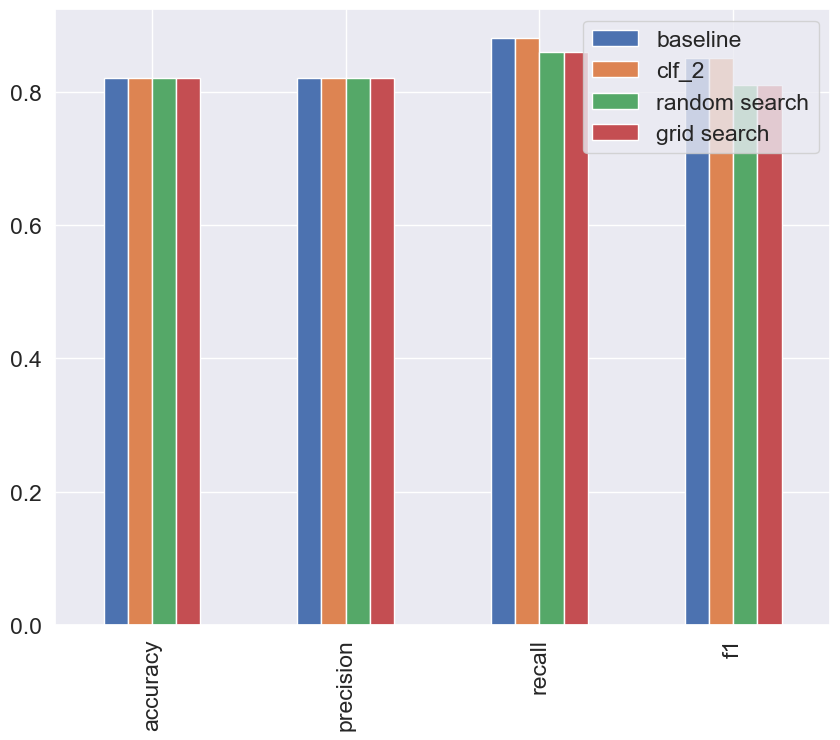

In [63]:
compare_metrics= pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize =(10,8));

** Over all our baseline model and second model(clf_2) performed better**

# 6. Experimentation

since evaluation metric of 95% accuracy was not met. We could try out the following steps: 

 * Collecting more data(samples) to help our model learn more patterns about the data.
 * Try a better model like CatBoost or XGBoost.
 * Further improving my model by tunning different hyperparameters.